# Analyzing outliers from data & Returning Dates

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import numpy as np
import os
import time
from itertools import chain
from IPython.display import display_html


##### ETF Data Clean up ###########

class ETFDataCleanup(object):
    
    def __init__(self):
        pass

    def showNaColumns(self,df):
        s=df.isnull().sum()
        print(s[s>0])
    
    def dropNAColumns(self,df):
        return df.dropna(axis='columns')
    
    def computeDailyReturns(self,df):
        return df.pct_change().dropna()        
    
    
####### Get Data for Constituents of ETF

class ConstituentsData(ETFDataCleanup):
    
    def __init__(self,fileName=None,startdate=None,enddate=None):
        self.fileName=fileName
        self.startdate=startdate
        self.enddate=enddate
        self.constituentdata=[]
        self.constituentcloseDF=[]
        self.tickerdf=[]
        self.changeDF=[]
        self.waDF=[]
    
    def getconstituentdata(self):
        self.tickerdf = pd.read_excel(self.fileName)
        tickers=self.tickerdf['Ticker']
        self.tickerdf.set_index('Ticker',inplace=True)
        self.constituentdata =  web.DataReader(tickers,'yahoo',self.startdate,self.enddate)
        self.constituentcloseDF = self.constituentdata['Close'].iloc[:, :]
        
    def stringWeightsToFloat(self):
        self.tickerdf['Weights']=self.tickerdf['Weights'].apply(lambda x: x.replace('%','')).astype(float)
    
    def findNetAssetValue(self):
        self.waDF=self.changeDF.copy()
        for col in self.changeDF.columns:
            # Divide by 100 for weights percentage eg 23.28%
            self.waDF[col]=self.changeDF[col]*self.tickerdf['Weights'].loc[col]/100
        self.waDF['NAV']=self.waDF.sum(axis=1)

####### Get prices of ETF        
class ETFStockPrices(ETFDataCleanup):
    
    def __init__(self,etfticker=None,startdate=None,enddate=None):
        self.etfticker=etfticker
        self.startdate=startdate
        self.enddate=enddate
        self.etfdata=[]
        self.etfchangeDF=[]

        
    def getETFTickerData(self):
        self.etfdata =  web.DataReader(self.etfticker,'yahoo',self.startdate,self.enddate)
 


class ETFArbitrage(object):

    def __init__(self,etfob,waDF):
        self.navDF=pd.merge(etfob,waDF['NAV'],left_index=True,right_index=True)
        self.navDF['Date']=self.navDF.index
        self.navDF['Close']=self.navDF['Close']*100
        self.navDF['NAV']=self.navDF['NAV']*100
        del self.navDF['Date']
        self.navDF['Mispricing']=(self.navDF['Close']-self.navDF['NAV'])
        self.navDF['Z-Score'] = np.abs(stats.zscore(self.navDF['Mispricing']))
    
    def scatterplot(self):
        plt.scatter(self.navDF['Close'],self.navDF['NAV'])
        
    def scatterplot2(self):
        #change figure size for the plot
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0]=12
        fig_size[1]=6
        plt.rcParams["figure.figsize"]=fig_size

        plt.scatter(self.navDF.index,self.navDF['Mispricing'])
    
    def seaborndist(self):
        sns.distplot(self.navDF['Mispricing'].values, hist=True, kde=True, 
             bins='auto', color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
        


# Load any ETF you want

XLK
Tickers with NA Values
Symbols
CTXS     3
NLOK    64
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
Symbols         AAPL       ACN      ADBE       ADI       ADP       ADS  \
Date                                                                     
2020-01-17  0.011071  0.001053  0.012624  0.002854  0.011379 -0.009822   
2020-01-21 -0.006777 -0.000239  0.000743 -0.001339 -0.003788 -0.009388   
2020-01-22  0.003570  0.001243  0.000171  0.009304  0.012089 -0.002056   
2020-01-23  0.004816  0.006065  0.004856  0.003654 -0.002804  0.001613   
2020-01-24 -0.002882 -0.010015 -0.001109 -0.027222 -0.003486 -0.039356   
2020-01-27 -0.029405 -0.009685 -0.012722 -0.045590 -0.008295 -0.016294   
2020-01-28  0.028289  0.017865  0.022283  0.018715  0.014567  0.015902   
2020-01-29  0.020932 -0.010845 -0.008375 -0.009448 -0.040718  0.021988   
2020-01-30 -0.001449  0.001971  0.014446 -0.007595  0.023211 -0.022883   
2020-01-31 -0.044339 -0.015165 -0.015698 -0.02331

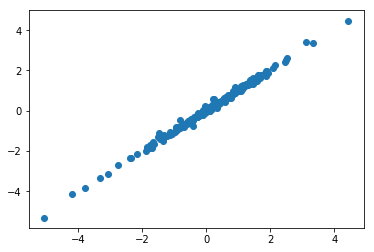

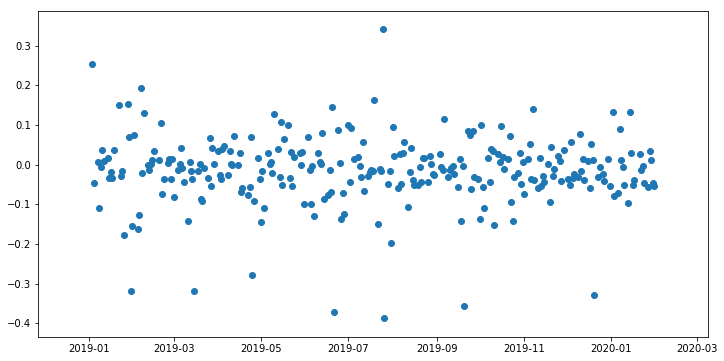

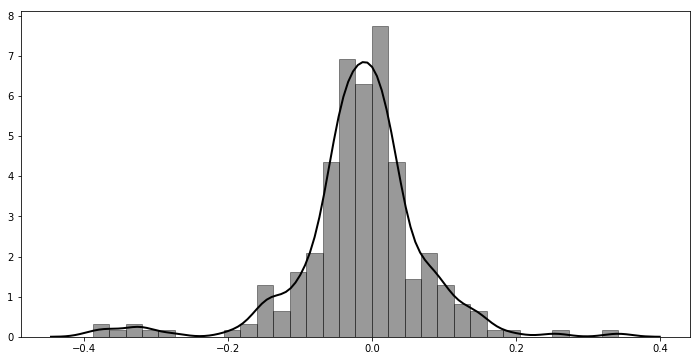

In [2]:
tickeretf="XLK"

filename='ETFDailyData'+'/'+dt.datetime.now().strftime("%Y%m%d")+'/'+tickeretf+'.xls'
startdate=dt.datetime(2019,1,1)
enddate=dt.datetime.today()

ob=ConstituentsData(fileName=filename,startdate=startdate,enddate=enddate)
ob.getconstituentdata()
print(tickeretf)
print("Tickers with NA Values")
ob.showNaColumns(ob.constituentcloseDF)
ob.constituentcloseDF=ob.dropNAColumns(ob.constituentcloseDF)
print("***************")
print("Check for NA Values again")
ob.showNaColumns(ob.constituentcloseDF)
ob.changeDF=ob.computeDailyReturns(ob.constituentcloshttp://localhost:3010eDF)
print(ob.changeDF.tail(10))


ob.stringWeightsToFloat()
ob.findNetAssetValue()

print("***************")
print("Data for Constituents")
print(ob.waDF.head(5))

etfob=ETFStockPrices(etfticker=tickeretf,startdate=startdate,enddate=enddate)
etfob.getETFTickerData()
print("Show Any Empty Values")
etfob.showNaColumns(etfob.etfdata)
etfob.etfchangeDF=etfob.computeDailyReturns(etfob.etfdata['Close'])


print("***************")
print("Data for ETF stock prices")
print(etfob.etfchangeDF.head(5))

print("****************")
print("Charts")
arbob=ETFArbitrage(etfob.etfchangeDF,ob.waDF)
arbob.scatterplot()
plt.show()
arbob.scatterplot2()
plt.show()
arbob.seaborndist()
plt.show()



# List down all objects of 3 different classes

In [14]:
print("Constituents Data Objects")
print(dir(ob))

print("*************************")
print("ETF Price Object")
print(dir(etfob))

print("*************************")
print("Arbitrage Data Object")
print(dir(arbob))

Constituents Data Objects
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'changeDF', 'computeDailyReturns', 'constituentcloseDF', 'constituentdata', 'dropNAColumns', 'enddate', 'fileName', 'findNetAssetValue', 'getconstituentdata', 'showNaColumns', 'startdate', 'stringWeightsToFloat', 'tickerdf', 'waDF']
*************************
ETF Price Object
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compute

## arbob.navDF is the ETF arbitrage dataframe which tells about 
1) Daily Return of ETF<br>
2) NET Asset Value of ETF<br>
3) Mispricing <br>
4) Stocks which moved XLK ETF the most<br>

In [15]:
print(arbob.navDF.head(5))

               Close       NAV  Mispricing   Z-Score
Date                                                
2019-01-03 -5.046761 -5.300708    0.253947  3.113180
2019-01-04  4.431993  4.478269   -0.046276  0.361776
2019-01-07  0.894308  0.888097    0.006211  0.245737
2019-01-08  0.838035  0.946958   -0.108923  1.086896
2019-01-09  1.294552  1.300598   -0.006046  0.103870


# Show me days with Arbitrage Opportunities of greater than 3 Standard Deviation

In [16]:
stdthresold=2.5

daysofarbitrage=arbob.navDF[arbob.navDF['Z-Score']>stdthresold]
daysofarbitrage

,Close,NAV,Mispricing,Z-Score
Date,,,,
2019-01-03,-5.046761,-5.300708,0.253947,3.113180
2019-01-30,3.108003,3.425864,-0.317861,3.505263
2019-03-15,0.884588,1.204289,-0.319701,3.526565
2019-04-25,-0.025351,0.253767,-0.279118,3.056833
2019-06-21,-0.823204,-0.451858,-0.371345,4.124324
2019-07-25,-0.410872,-0.752618,0.341747,4.129426
2019-07-26,0.218411,0.605987,-0.387576,4.312185
2019-09-20,-1.473112,-1.117463,-0.355649,3.942646
2019-12-20,0.253523,0.581998,-0.328475,3.628122


## Stocks Returns, Volume & Volume Weighted Returns Standard Deviation

In [17]:
# Good Function
class ZscoreAnlysByAttr():

    def __init__(self,data,zthresh,colname):
        self.data=data
        self.data.name=self.data.name+' '+colname
        self.zthresh=zthresh
        
    def getMispricedData(self):
        self.df=self.data.to_frame()
        self.df['Z-Score']=np.abs(stats.zscore(self.df.values.tolist()))
        self.requiredDF=self.df[self.df['Z-Score']>self.zthresh]
        return self.requiredDF

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [18]:
ticker ='AAPL'
weightedMovement=ob.changeDF[ticker]*ob.constituentdata['Volume'][ticker]
weightedMovement=weightedMovement.dropna()

stockVolumeStd=ZscoreAnlysByAttr(ob.constituentdata['Volume'][ticker],stdthresold,'Volume').getMispricedData()
stockReturnStd=ZscoreAnlysByAttr(ob.changeDF[ticker]*100,stdthresold,'Return').getMispricedData()
stockweightedmovement=ZscoreAnlysByAttr(weightedMovement,stdthresold,'Volume Weighted Return').getMispricedData()

In [19]:
display_side_by_side(stockVolumeStd,stockReturnStd,stockweightedmovement)

,AAPL Volume,Z-Score
Date,,
2019-01-03,91312200.0,5.842951
2019-01-04,58607100.0,2.797687
2019-01-30,61109800.0,3.030721
2019-05-01,64827300.0,3.376868
2019-05-13,57430600.0,2.688140
2019-07-31,69281400.0,3.791601
2019-09-20,55413100.0,2.500285
2019-12-20,68994500.0,3.764887
,AAPL Return,Z-Score


In [35]:
weightedMovement

Date
2019-01-03    -30828.572355
2019-01-04     29989.748126
2019-01-07     16682.952550
2019-01-08      5615.604370
2019-01-09     13432.217860
2019-01-10       323.673752
2019-01-11      7397.356685
2019-01-14      1085.052604
2019-01-15      7290.031938
2019-01-16      6095.251408
2019-01-17     26711.435519
2019-01-18      4544.330029
2019-01-22    -12136.180496
2019-01-23       263.313120
2019-01-24      3360.364803
2019-01-25      2740.531840
2019-01-28     -8044.433566
2019-01-29     -3085.935665
2019-01-30      1441.934737
2019-01-31      5081.058194
2019-02-01      4829.072949
2019-02-04      2391.703127
2019-02-05      4988.212817
2019-02-06      4377.630505
2019-02-07     -5719.121207
2019-02-08      -763.277300
2019-02-11      3736.653516
2019-02-12      9389.542683
2019-02-13      3369.040363
2019-02-14    186817.142860
                  ...      
2019-12-18      5762.522960
2019-12-19     -7156.678347
2019-12-20    -29274.921147
2019-12-23     13642.442820
2019-12-24     

In [21]:
d=[list(daysofarbitrage.index),list(stockVolumeStd.index),list(stockReturnStd.index),list(stockweightedmovement.index)]
#d=[list(stockReturnStd.index),list(daysofarbitrage.index)]
set.intersection(*map(set,d))

{Timestamp('2019-01-03 00:00:00'), Timestamp('2019-01-30 00:00:00')}

### Find Intersection of Dates where values were > 3 std <br>
 1) daysofarbitrage - When ETF Gave 3 STD away Returns<br>
 2) stockVolumeStd - When Volume was 3 std away from normal day for Stock<br>
 3) stockReturnStd - When Daily Returns were 3 srd away from normal days<br>
 4) stockweightedmovement - When Daily Returns * Volume were 3 Stanadrd Deviation Away<br>

### Finding Dates for Mispricing Due to any of all Tickers

In [22]:
tickers=ob.constituentcloseDF.columns
DF=pd.DataFrame()
kvpairs={}

for ticker in tickers:
    
    weightedMovement=ob.changeDF[ticker]*ob.constituentdata['Volume'][ticker]
    weightedMovement=weightedMovement.dropna()
    
    stockVolumeStd=ZscoreAnlysByAttr(ob.constituentdata['Volume'][ticker],stdthresold,'Volume').getMispricedData()
    stockReturnStd=ZscoreAnlysByAttr(ob.changeDF[ticker]*100,stdthresold,'Return').getMispricedData()
    stockweightedmovement=ZscoreAnlysByAttr(weightedMovement,stdthresold,'Volume Weighted Return').getMispricedData()
    
    d=[list(daysofarbitrage.index),list(stockweightedmovement.index)]
    
    lst=(list(set.intersection(*map(set,d))))
    if len(lst)>0:
        kvpairs[ticker]=lst

       
MispriceDF=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in kvpairs.items() ]))
print(MispriceDF.T)

              0          1          2
AAPL 2019-01-03 2019-01-30        NaT
ACN  2019-01-03        NaT        NaT
ADBE 2019-03-15        NaT        NaT
ADI  2019-01-03        NaT        NaT
ADP  2019-01-03 2019-01-30        NaT
AKAM 2019-12-20        NaT        NaT
AMAT 2019-01-03        NaT        NaT
AMD  2019-01-03 2019-01-30        NaT
ANSS 2019-12-20 2019-01-03        NaT
APH  2019-01-03        NaT        NaT
AVGO 2019-03-15 2019-01-03        NaT
CDW  2019-09-20        NaT        NaT
FFIV 2019-12-20 2019-07-26        NaT
FISV 2019-07-26        NaT        NaT
FLIR 2019-04-25 2019-07-25        NaT
GLW  2019-01-03        NaT        NaT
JNPR 2019-01-30        NaT        NaT
KLAC 2019-01-30        NaT        NaT
MA   2019-01-03        NaT        NaT
MCHP 2019-01-03        NaT        NaT
MSFT 2019-04-25 2019-01-03 2019-01-30
MXIM 2019-03-15 2019-01-03        NaT
NOW  2019-04-25        NaT        NaT
PYPL 2019-07-25        NaT        NaT
STX  2019-01-03        NaT        NaT
SWKS 2019-01

# Adding Stocks which caused miss pricing to dataframe 

In [23]:
# Invert a dict
class InvertDict(object):

    def invertdict(self,d):
        newdict = {}
        for key, value in d.items():
            for string in value:
                newdict.setdefault(string, []).append(key)
    
        return newdict

In [24]:
stockscausingmispricing=InvertDict().invertdict(kvpairs)

In [25]:
daysofarbitrage['Stocks Caused Mispricing'] = daysofarbitrage.index.to_series().map(stockscausingmispricing)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
daysofarbitrage

,Close,NAV,Mispricing,Z-Score,Stocks Caused Mispricing
Date,,,,,
2019-01-03,-5.046761,-5.300708,0.253947,3.113180,"[AAPL, ACN, ADI, ADP, AMAT, AMD, ANSS, APH, AV..."
2019-01-30,3.108003,3.425864,-0.317861,3.505263,"[AAPL, ADP, AMD, JNPR, KLAC, MSFT, XRX]"
2019-03-15,0.884588,1.204289,-0.319701,3.526565,"[ADBE, AVGO, MXIM, TXN]"
2019-04-25,-0.025351,0.253767,-0.279118,3.056833,"[FLIR, MSFT, NOW, XLNX]"
2019-06-21,-0.823204,-0.451858,-0.371345,4.124324,NaN
2019-07-25,-0.410872,-0.752618,0.341747,4.129426,"[FLIR, PYPL]"
2019-07-26,0.218411,0.605987,-0.387576,4.312185,"[FFIV, FISV]"
2019-09-20,-1.473112,-1.117463,-0.355649,3.942646,[CDW]
2019-12-20,0.253523,0.581998,-0.328475,3.628122,"[AKAM, ANSS, FFIV]"


# Work to be done

1) In daysofarbitrage dataframe change 'close' to 'Etf Return' <br>
2) In daysofarbitrage dataframe add a 'close' column for ETF closing price. It's important to see daily price.<br>
3) https://etfdb.com/etfs/sector/healthcare/<br>

In [51]:
ob.constituentdata.dropna()['Close']['NLOK']

Date
2019-03-08    21.950001
2019-03-11    22.379999
2019-03-12    22.459999
2019-03-13    22.950001
2019-03-14    22.930000
2019-03-15    23.020000
2019-03-18    23.070000
2019-03-19    23.209999
2019-03-20    23.139999
2019-03-21    23.590000
2019-03-22    22.860001
2019-03-25    22.879999
2019-03-26    23.230000
2019-03-27    22.840000
2019-03-28    22.940001
2019-03-29    22.990000
2019-04-01    23.190001
2019-04-02    23.150000
2019-04-03    23.330000
2019-04-04    23.040001
2019-04-05    22.990000
2019-04-08    24.240000
2019-04-09    23.879999
2019-04-10    23.740000
2019-04-11    23.900000
2019-04-12    23.959999
2019-04-15    24.410000
2019-04-16    24.299999
2019-04-17    24.469999
2019-04-18    24.400000
                ...    
2019-12-18    25.980000
2019-12-19    26.020000
2019-12-20    25.510000
2019-12-23    25.730000
2019-12-24    25.680000
2019-12-26    25.450001
2019-12-27    25.600000
2019-12-30    25.480000
2019-12-31    25.520000
2020-01-02    26.020000
2020-01-03 